# Bayesian Monthly Sensitivity Model

## Adapted for SimFarm2030
## 3 models are tested, with different ways to calculate the standard deviation
$tmp = \Sigma S*dT$ 

$dY \sim N(tmp,1)$

$dY \sim N(tmp,\sqrt{\Sigma S^2 * \sigma_T^2} )$

$dY \sim N(tmp, free\ paramter)$


In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import pystan

%matplotlib inline

In [2]:
# Compile model, for N(tmp,1)
sm=pystan.StanModel(file='stan/BMSM-simp.stan') # reads in the stan model wit sigma = 1

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e7839d65b913f1005fc3976af2843100 NOW.
C:\Users\Andrew\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Andrew\AppData\Local\Temp\tmpmn813llu\stanfit4anon_model_e7839d65b913f1005fc3976af2843100_344437662975378095.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [3]:
templists,yieldlist =[],[]

for counter in range(1,7):
    templists.append(np.load('TempAnom'+str(counter)+'.npy'))
    
for counter in range(1,7):
    yieldlist.append(np.load('YieldAnom'+str(counter)+'.npy'))
    

templists = np.array(templists)
yieldlist= np.array(yieldlist)

templists = templists.reshape(6,int(len(templists[0])/12),12)


data={
    'n_regions':2,
    'n_years':8,
    'd_temp':templists[0:2],
    'd_yields':yieldlist[0:2],
}




In [4]:
fit=sm.sampling(data=data,chains=4,iter=1000,verbose=True,control={'max_treedepth': 13})

In [5]:
fit

Inference for Stan model: anon_model_e7839d65b913f1005fc3976af2843100.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
s_temp[1,1]          1.07    1.87  75.29 -142.7 -50.45 3.3e-3  53.16 149.29   1629    1.0
s_temp[2,1]         -1.26    1.64  74.12 -146.8 -50.29  -2.44  49.89 149.49   2039    1.0
s_temp[1,2]          2.39    1.31  54.89 -105.5 -35.08   0.81  40.75 104.44   1758    1.0
s_temp[2,2]          0.65    1.33  46.05 -86.21 -29.94  -0.98  30.94  94.39   1195   1.01
s_temp[1,3]         -0.92    1.58  62.33 -125.2 -44.21   -3.1  39.22 121.86   1562    1.0
s_temp[2,3]          3.09    1.34  58.62 -111.6 -36.52   1.58  40.45 122.69   1909    1.0
s_temp[1,4]         -3.96    1.49  59.95 -119.2 -47.08  -2.09  38.78 107.46   1613    1.0
s_temp[2,4]           2.0    0.49  20.28 -37.39 -11.66   2.04  16.33  41.34   1731    1.0
s_t

In [6]:
samples=fit.extract()

In [7]:
'''

# Results Edward Pope, linear fit for 'Indiana'

arr = [np.nan,np.nan,np.nan,0.0862453406310437,0.0232350785672767,-0.118245529967667,
       -0.443216771777978,-0.200990287316511,0.0590919010412627,-0.000147094860475441,np.nan,np.nan]
dT_all_states= np.array(temp_states.iloc[:,1:]).reshape(len(states),np.int(np.array(temp_states.iloc[:,1:]).shape[0]/len(states)),12)

dT = dT_all_states[0,:,:]
aT = np.zeros(35)

arr = np.array(arr)
use = np.isfinite(arr)
arr[~use] = 0.0
for i in range(np.size(aT)):
    aT[i] = np.sum(arr*dT[i,:])
'''

"\n\n# Results Edward Pope, linear fit for 'Indiana'\n\narr = [np.nan,np.nan,np.nan,0.0862453406310437,0.0232350785672767,-0.118245529967667,\n       -0.443216771777978,-0.200990287316511,0.0590919010412627,-0.000147094860475441,np.nan,np.nan]\ndT_all_states= np.array(temp_states.iloc[:,1:]).reshape(len(states),np.int(np.array(temp_states.iloc[:,1:]).shape[0]/len(states)),12)\n\ndT = dT_all_states[0,:,:]\naT = np.zeros(35)\n\narr = np.array(arr)\nuse = np.isfinite(arr)\narr[~use] = 0.0\nfor i in range(np.size(aT)):\n    aT[i] = np.sum(arr*dT[i,:])\n"

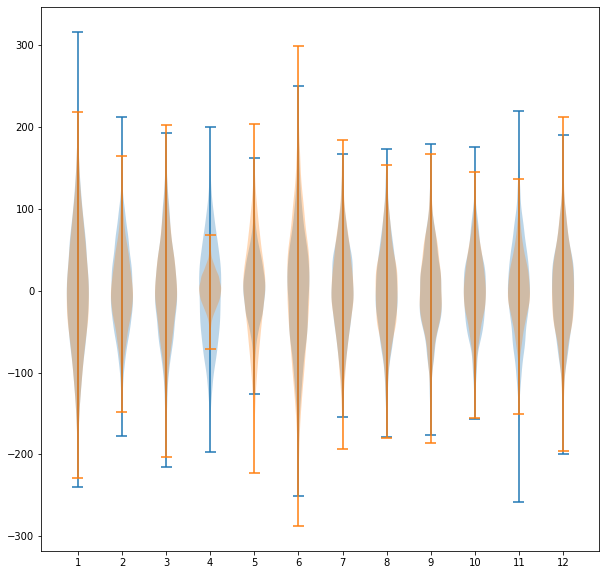

In [8]:
# violin plot for Indiana Illinois
plt.figure(figsize=(10,10))
plt.violinplot(samples['s_temp'][:,0,:]);
plt.violinplot(samples['s_temp'][:,1,:]);
plt.xticks(range(1,13));
#plt.scatter(range(1,13),arr, color = 'red', s = 45);
plt.show()

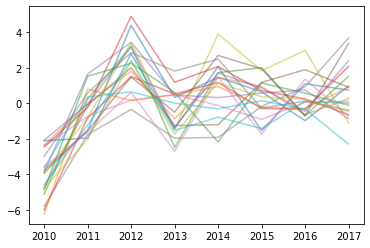

In [9]:
for s in range(0,2000,100):
    plt.plot(range(2010,2018),samples['d_yields_pred'][s,0,:].T,alpha=0.5)

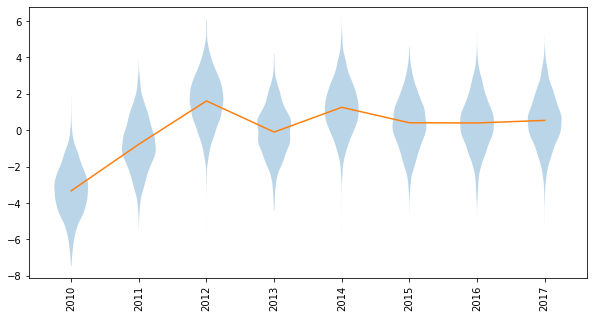

In [10]:
# orange is true results, and blue are the histograms of the output from stan fo 'Indiana'
plt.figure(figsize=(10,5))
plt.violinplot(samples['d_yields_pred'][:,0,:],showextrema=False);
plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][0,:])


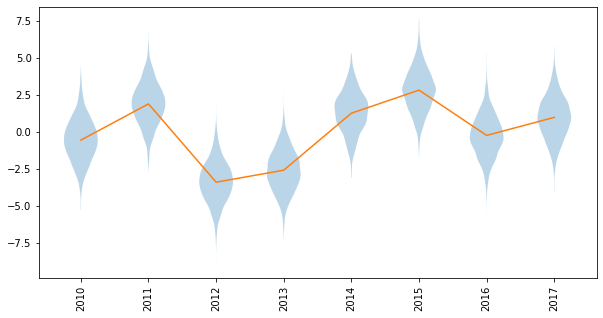

In [11]:
# orange is true results, and blue are the histograms of the output from stan fo 'Indiana'
plt.figure(figsize=(10,5))
plt.violinplot(samples['d_yields_pred'][:,1,:],showextrema=False);
plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][1,:])


In [12]:
sm_SD=pystan.StanModel(file='stan\BMSM-simp_SD.stan') # stan model with sigma = \sqrt{\Sigma S^2 * \sigma_T^2}
# reads in var(T) as extra parameter, 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_03796d5a0612fe07b56c2e7d64de72fc NOW.
C:\Users\Andrew\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Andrew\AppData\Local\Temp\tmpj64jqbmg\stanfit4anon_model_03796d5a0612fe07b56c2e7d64de72fc_5500414829740462736.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [13]:
data_T= templists[0:2]
# calculate the standard deviation in T over the years per month, in this case for two states
sigma_T = np.zeros([2,12])

for i in range(2):
    sigma_T[i,:] = np.std(data_T[i,:,:],axis = 0)

    
print(np.shape(data_T))    
print(np.shape(yieldlist[0:2]))

(2, 8, 12)
(2, 8)


In [14]:
data={
    'n_regions':2,
    'n_years':8,
    'd_temp':templists[0:2],
    'd_yields':yieldlist[0:2],
    'var_temp':sigma_T**2
}



In [15]:
fit2=sm_SD.sampling(data=data,chains=4,iter=1000,verbose=True) # fit to the second model

In [16]:
fit2

Inference for Stan model: anon_model_03796d5a0612fe07b56c2e7d64de72fc.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
s_temp[1,1]          0.38     1.3  55.79 -117.4 -33.85   1.68   34.1 111.64   1846    1.0
s_temp[2,1]          2.62    1.28  58.18 -115.6  -35.7   5.47   38.5 119.87   2064    1.0
s_temp[1,2]          0.48    1.11  49.47 -99.34 -29.39   0.35  29.84 104.01   1975    1.0
s_temp[2,2]         -1.24    1.06  46.28 -99.26 -27.63  -1.49  26.75   94.4   1894    1.0
s_temp[1,3]         -4.06    1.34  56.59 -120.9  -38.8  -4.21  30.53 109.12   1783    1.0
s_temp[2,3]         -1.41    1.25  52.14 -106.0 -33.94  -2.95  31.28 105.14   1728    1.0
s_temp[1,4]          -1.6    1.28  56.13 -114.0 -34.87   0.46  32.01 111.55   1928    1.0
s_temp[2,4]         -0.63    1.31  53.35 -117.9 -31.53    1.2  29.46 105.55   1659    1.0
s_t

In [17]:
samples2=fit2.extract()


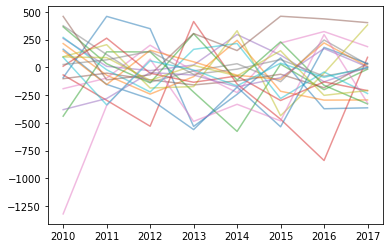

In [18]:
for s in range(0,2000,100):
    plt.plot(range(2010,2018),samples2['d_yields_pred'][s,0,:].T,alpha=0.5)

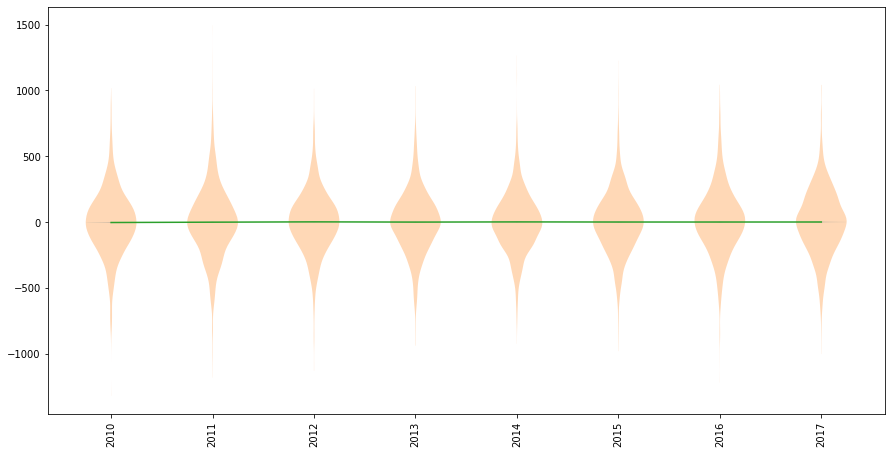

In [19]:
plt.figure(figsize=(15,7.5))
plt.violinplot(samples['d_yields_pred'][:,0,:],showextrema=False);
plt.violinplot(samples2['d_yields_pred'][:,0,:],showextrema=False);
plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][0,:])

In [20]:
print(np.sqrt(np.sum(np.mean(samples2['s_temp'][:,0,:],axis = 0)**2*data_T[0,:]**2)))

#print(np.mean(samples['s_temp'][:,0,:],axis = 0))

31.858379179622375


In [21]:
sm3=pystan.StanModel(file='stan/free_stan.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c35c7b27fccfae7dc02f4234be2d3eac NOW.
C:\Users\Andrew\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Andrew\AppData\Local\Temp\tmpcm9bi6_o\stanfit4anon_model_c35c7b27fccfae7dc02f4234be2d3eac_3818743544949989144.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [22]:
fit3=sm3.sampling(data=data,chains=4,iter=1000,verbose=True)

In [23]:
fit3

Inference for Stan model: anon_model_c35c7b27fccfae7dc02f4234be2d3eac.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
s_temp[1,1]         -4.48    6.68  72.69 -146.9 -53.39   -5.9  47.89  134.8    118   1.03
s_temp[2,1]        -30.78    6.93  70.27 -168.6 -75.99 -32.75  11.04 120.75    103   1.05
s_temp[1,2]         -2.15    4.29  45.99 -89.21 -34.66  -1.99  28.41  84.32    115   1.01
s_temp[2,2]         15.32    7.66  51.67 -96.21  -21.8  16.34   53.0 117.22     45   1.07
s_temp[1,3]          1.79    9.93  64.79 -106.2 -40.88  -9.58  37.21 144.99     43   1.09
s_temp[2,3]          -6.1    7.97  61.05 -118.2 -48.76  -7.02  37.27 120.48     59   1.07
s_temp[1,4]          0.15    5.73  54.85 -110.5 -37.76   1.02  38.64 104.57     91   1.01
s_temp[2,4]          1.13     2.7   22.8 -43.96  -13.9   2.08  17.19  43.38     71   1.05
s_t

In [24]:
samples3=fit3.extract()


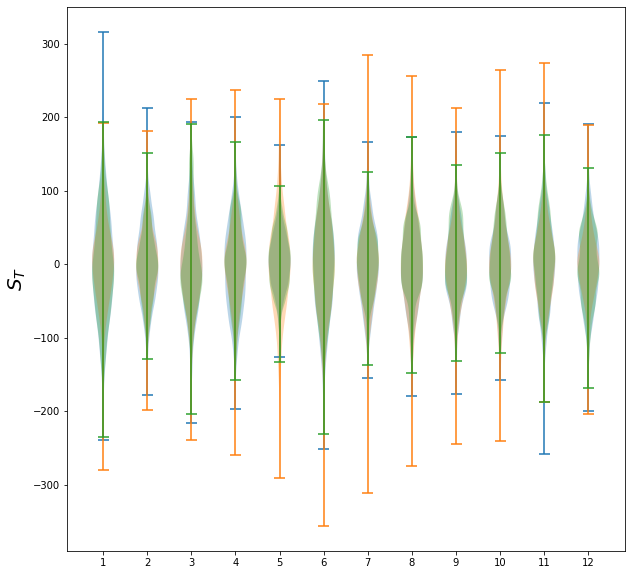

In [25]:
plt.figure(figsize=(10,10)) # violinplot for the 3 models, plus the linear fitting in red for 'Indiana'
plt.violinplot(samples['s_temp'][:,0,:]);
plt.violinplot(samples2['s_temp'][:,0,:]);
plt.violinplot(samples3['s_temp'][:,0,:]);

plt.ylabel('$S_T$', size = 20)


#plt.scatter(range(1,13),arr, color = 'red', s = 45);
plt.xticks(range(1,13));

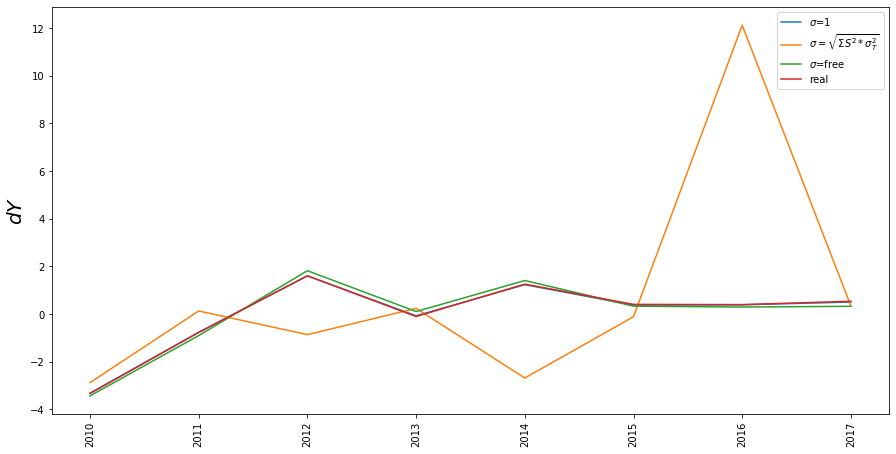

0.0020708242044794167
39.6270053532219
0.0019229112050199997


In [27]:
plt.figure(figsize=(15,7.5))
#plt.violinplot(samples['d_yields_pred'][:,0,:],showextrema=False);
#plt.violinplot(samples2['d_yields_pred'][:,0,:],showextrema=False);
#plt.violinplot(samples3['d_yields_pred'][:,0,:],showextrema=False);
plt.plot(range(1,9), np.mean(samples['d_yields_pred'][:,0,:],axis = 0) , label = '$\sigma$=1')
plt.plot(range(1,9), np.mean(samples2['d_yields_pred'][:,0,:],axis = 0), label = '$\sigma=\sqrt{\Sigma S^2 * \sigma_T^2}$' )
plt.plot(range(1,9), np.mean(samples3['d_yields_pred'][:,0,:],axis = 0), label = '$\sigma$=free' )
#plt.plot(range(1,9), aT, label = 'Ed' )

plt.xticks(range(1,9),np.arange(2010,2018),rotation=90);
plt.plot(range(1,9),fit.data['d_yields'][0,:], label = 'real')
plt.ylabel('$dY$', size = 20)

plt.legend()
plt.show()

#the sum of the square deviations of the 3 models 
print(np.sum(np.mean(samples['d_yields_pred'][:,0,:],axis = 0)-fit.data['d_yields'][0,:])**2)
print(np.sum(np.mean(samples2['d_yields_pred'][:,0,:],axis = 0)-fit.data['d_yields'][0,:])**2)
print(np.sum(np.mean(samples3['d_yields_pred'][:,0,:],axis = 0)-fit.data['d_yields'][0,:])**2)
#print(np.sum(aT-fit.data['d_yields'][0,:])**2)


In [28]:
dataT=templists
print(np.std(dataT[0,:,:],axis =1 ))


[3.12343815 2.29855633 2.43339221 2.8225386  2.24384003 2.12205948
 2.88464659 2.57765788]
